In [1]:
from data_loader import data_loader
from RNN_model import RNN_model, train_model, test_model

import torch.nn as nn
import pandas as pd
import numpy as np
import torch

input_dim = 1 # Fake.

hidden_dim = 10
layer_dim = 1
output_dim = 3


In [2]:
# Return size: [batch_size, length]
input_train, label_train, input_test, label_test = data_loader()

In [3]:
print(input_train.size())
print(input_test.size())

l = [1104, 1028, 980, 964, 960, 956, 956, 932, 868, 840, 836, 808]

train_seq_lens = np.zeros((12*12))
for i in range(len(l)):
    train_seq_lens[i*12: (i+1)*12] = l[i]

test_seq_lens = np.zeros((4*12))
for i in range(len(l)):
    test_seq_lens[i*4: (i+1)*4] = l[i]   

print(train_seq_lens[0:13])
print(test_seq_lens[0:9]) 

torch.Size([144, 1104])
torch.Size([48, 1104])
[1104. 1104. 1104. 1104. 1104. 1104. 1104. 1104. 1104. 1104. 1104. 1104.
 1028.]
[1104. 1104. 1104. 1104. 1028. 1028. 1028. 1028.  980.]


In [4]:
rnn_model = RNN_model(input_dim, hidden_dim, layer_dim, output_dim)

torch.Size([144, 1104, 1])
Epoch: 10/100............. Loss: 1.0717 Accuracy: 33.33
Epoch: 20/100............. Loss: 1.0711 Accuracy: 33.33
Epoch: 30/100............. Loss: 1.0705 Accuracy: 33.33
Epoch: 40/100............. Loss: 1.0698 Accuracy: 33.33
Epoch: 50/100............. Loss: 1.0692 Accuracy: 33.33
Epoch: 60/100............. Loss: 1.0685 Accuracy: 33.33
Epoch: 70/100............. Loss: 1.0679 Accuracy: 33.33
Epoch: 80/100............. Loss: 1.0672 Accuracy: 33.33
Epoch: 90/100............. Loss: 1.0665 Accuracy: 33.33
Epoch: 100/100............. Loss: 1.0659 Accuracy: 33.33


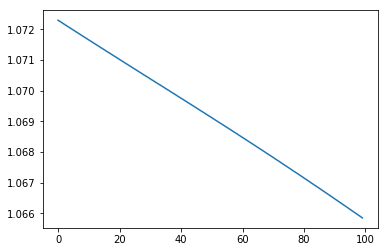

In [5]:
lr = 0.0001
epochs = 100

flat_input_train = input_train.unsqueeze(-1)
print(flat_input_train.size())
train_model(rnn_model, flat_input_train, label_train, train_seq_lens, lr=lr, epochs=epochs)

In [6]:

flat_input_test = input_test.unsqueeze(-1)
print(flat_input_test.size())
acc, pred = test_model(rnn_model, flat_input_test, label_test, test_seq_lens)


torch.Size([48, 1104, 1])
Testing Accuracy: 33.33 %


In [7]:
from utils import confusion, F1_score


mat = confusion(input_test.size(0), output_dim, pred, label_test)
print("Confusion Matrix：")
print(mat)
F1_score(mat)

Confusion Matrix：
tensor([[ 0.,  0., 16.],
        [ 0.,  0., 16.],
        [ 0.,  0., 16.]])

Precision: [0, 0, 0.33333334] ; 
Average precision: 0.11111111442248027

Recall: [0.0, 0.0, 1.0] ; 
Average recall: 0.3333333432674408

F1 Score: [0, 0, 0.5] ; 
Average F1 Score: 0.16666666666666666


In [8]:
print(rnn_model)
print(rnn_model.rnn.state_dict)
print(rnn_model.rnn.parameters)

RNN_model(
  (rnn): RNN(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=3, bias=True)
  (softmax): LogSoftmax()
)
<bound method Module.state_dict of RNN(1, 10, batch_first=True)>
<bound method Module.parameters of RNN(1, 10, batch_first=True)>


In [10]:
print(rnn_model.rnn.all_weights)

[[Parameter containing:
tensor([[-0.1297],
        [ 0.1227],
        [-0.1905],
        [-0.3138],
        [ 0.2275],
        [ 0.2231],
        [ 0.1461],
        [ 0.2869],
        [ 0.2578],
        [ 0.2132]], requires_grad=True), Parameter containing:
tensor([[-0.1572,  0.2004, -0.2248, -0.0947,  0.0631,  0.1361, -0.2617,  0.1165,
          0.2625,  0.0071],
        [-0.1333, -0.1717,  0.2517,  0.0919, -0.2935, -0.2044,  0.0621, -0.0198,
          0.1736,  0.2679],
        [-0.2091,  0.2298,  0.0306,  0.3046,  0.0558,  0.0361,  0.2552,  0.1035,
          0.2660, -0.0910],
        [-0.0128, -0.1185, -0.1095,  0.2508, -0.0600,  0.1315,  0.1530, -0.1817,
         -0.3057,  0.1616],
        [-0.0409, -0.2745, -0.1744,  0.0614, -0.1944,  0.0218, -0.1319,  0.1138,
         -0.1211,  0.2125],
        [-0.1569,  0.2702, -0.2042, -0.0209,  0.2374, -0.0790,  0.1558,  0.1934,
         -0.1553, -0.0357],
        [-0.1552,  0.2055,  0.0834,  0.0171,  0.1287,  0.2121, -0.1219, -0.3124,
       

In [11]:
print(rnn_model.rnn.all_weights)


[[Parameter containing:
tensor([[-0.1297],
        [ 0.1227],
        [-0.1905],
        [-0.3138],
        [ 0.2275],
        [ 0.2231],
        [ 0.1461],
        [ 0.2869],
        [ 0.2578],
        [ 0.2132]], requires_grad=True), Parameter containing:
tensor([[-0.1572,  0.2004, -0.2248, -0.0947,  0.0631,  0.1361, -0.2617,  0.1165,
          0.2625,  0.0071],
        [-0.1333, -0.1717,  0.2517,  0.0919, -0.2935, -0.2044,  0.0621, -0.0198,
          0.1736,  0.2679],
        [-0.2091,  0.2298,  0.0306,  0.3046,  0.0558,  0.0361,  0.2552,  0.1035,
          0.2660, -0.0910],
        [-0.0128, -0.1185, -0.1095,  0.2508, -0.0600,  0.1315,  0.1530, -0.1817,
         -0.3057,  0.1616],
        [-0.0409, -0.2745, -0.1744,  0.0614, -0.1944,  0.0218, -0.1319,  0.1138,
         -0.1211,  0.2125],
        [-0.1569,  0.2702, -0.2042, -0.0209,  0.2374, -0.0790,  0.1558,  0.1934,
         -0.1553, -0.0357],
        [-0.1552,  0.2055,  0.0834,  0.0171,  0.1287,  0.2121, -0.1219, -0.3124,
       